# REQUIREMENTS USED DURING THIS PRODUCTION

In [1]:
#Python library that is used for data analysis
import pandas as pd
#NumPy is a python library used for working with arrays
import numpy as np
#matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
#Python data visualization library based on matplotlib
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Panda library used for reating data from yahoo finance
from pandas_datareader.data import DataReader

# This is used to import and parse time stamp
from datetime import datetime

# TECH LIST

In [2]:
# tech_list is the list of stocks that we will use to analyse our problem statement. It consists of aaple as AAPL, google as GOOG, microsoft as MSFT and amazon as AMZN
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Setting up end time, which is our current data
end = datetime.now()
# Setting up start time, which is our old data 
start = datetime(end.year - 1, end.month, end.day)

# The for loop used below is used for setting up dataframe and grabbing data from yahoo finance
for stock in tech_list:   
    # Here we are setting up dataframe as the Stockticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-01-26,3338.000000,3282.870117,3296.360107,3326.129883,2955200.0,3326.129883,AMAZON
2021-01-27,3346.520020,3207.080078,3341.489990,3232.580078,4660200.0,3232.580078,AMAZON
2021-01-28,3301.679932,3228.689941,3235.040039,3237.620117,3149200.0,3237.620117,AMAZON
2021-01-29,3236.989990,3184.550049,3230.000000,3206.199951,4285600.0,3206.199951,AMAZON
2021-02-01,3350.260010,3235.030029,3242.360107,3342.879883,4160200.0,3342.879883,AMAZON
2021-02-02,3427.739990,3361.129883,3380.000000,3380.000000,7098600.0,3380.000000,AMAZON
2021-02-03,3434.000000,3308.620117,3425.010010,3312.530029,7088800.0,3312.530029,AMAZON
2021-02-04,3347.000000,3277.750000,3330.000000,3331.000000,3670700.0,3331.000000,AMAZON
2021-02-05,3377.000000,3302.709961,3319.000000,3352.149902,3613600.0,3352.149902,AMAZON


In [4]:
# here we are using apple dataframe and checking whether if we are getting our desired output or not.
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,102.337927,99.358839,100.856726,100.906865,1.548842e+08,100.522229
std,24.013967,23.529717,23.958482,23.762408,7.114145e+07,23.868382
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.911875,78.415001,79.011877,79.205002,1.041511e+08,78.808517
50%,110.834999,107.494999,109.121250,108.898750,1.372656e+08,108.465508
75%,121.287498,118.255001,119.984999,119.692499,1.848412e+08,119.513906
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [5]:
# using this we can get the basic info regarding apple's high, low, open etc.
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-02-10 to 2021-02-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


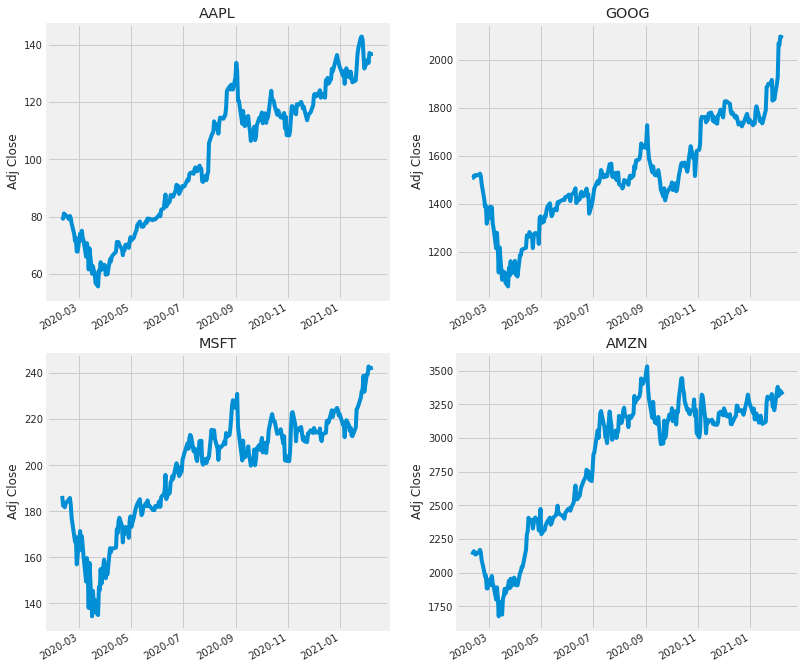

In [6]:
# in the following code we are presenting a historical view of the closing price on the basis of adj close values
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

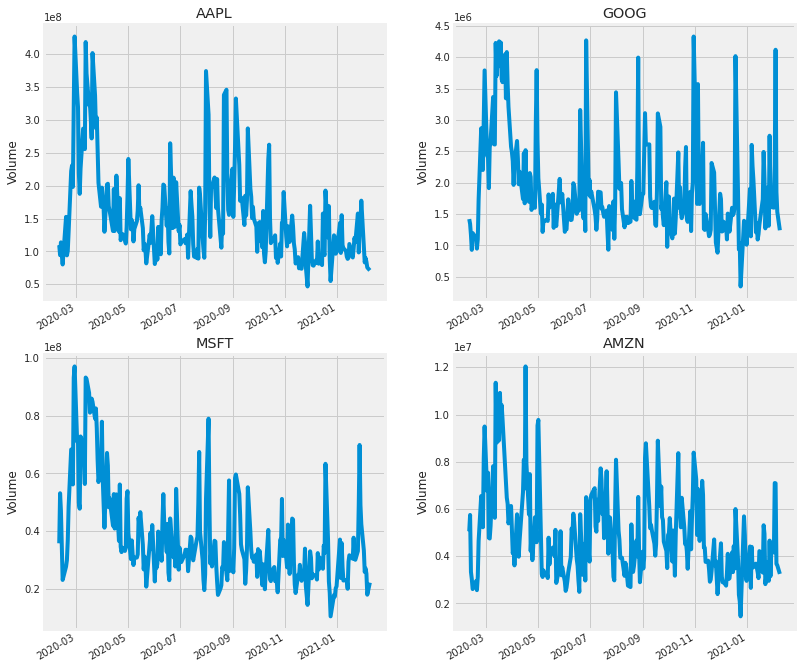

In [7]:
# the following graphs shows the volume per day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# MOVING AVERAGE ALGORITHM

In [8]:
# this step is used for setting up moving average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [9]:
# this step is used to check the parameters 
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


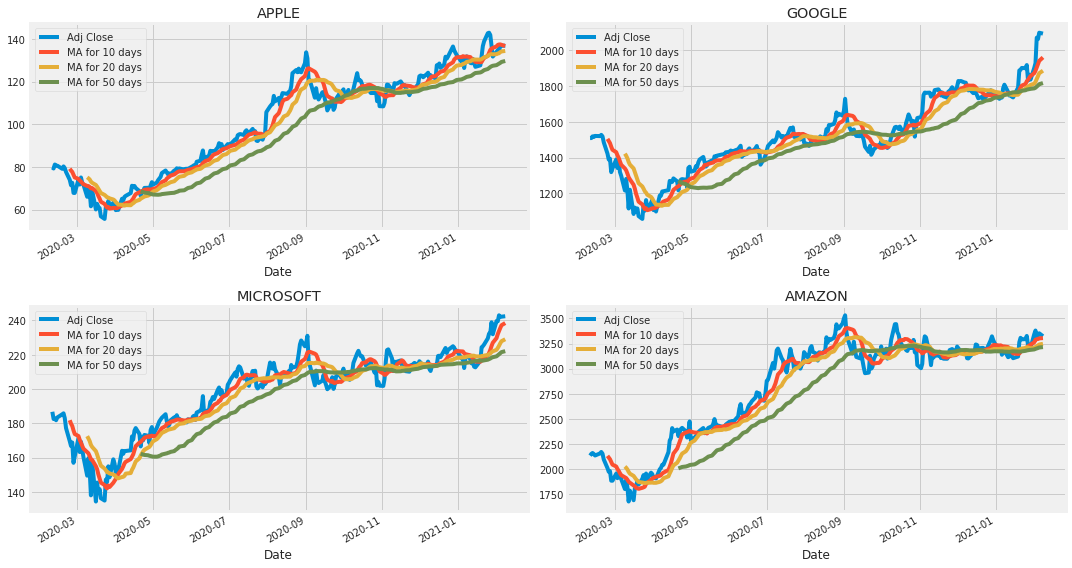

In [10]:
# the following graph si used to set up and make graph for moving average for 10 days, 20 days and 50 days.
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

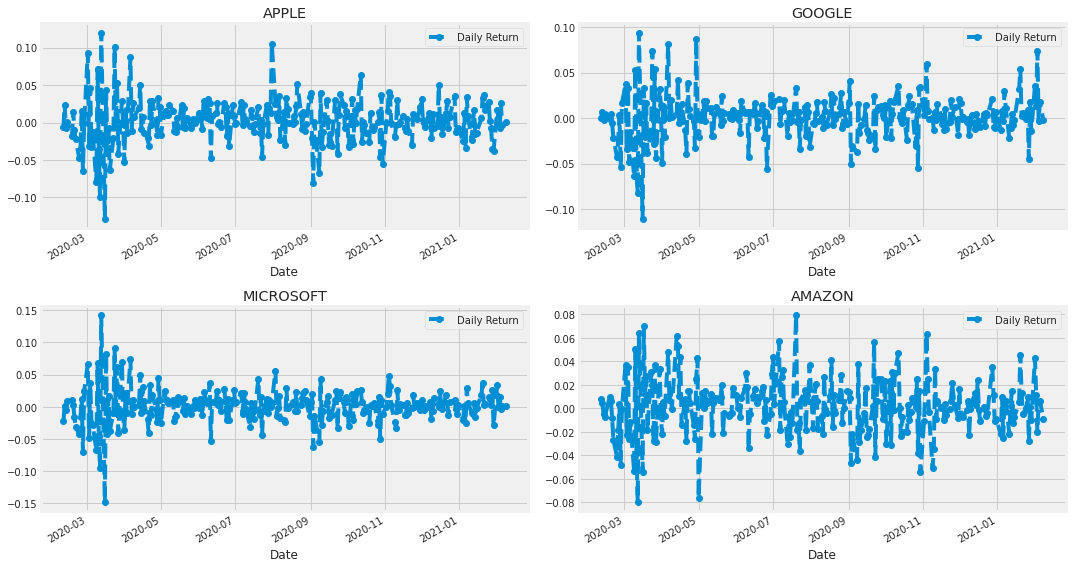

In [11]:
# we'll use the function, pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# the following graph shows daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


In [12]:
# we have to now grap all the closing price for the tech stock into one data frame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,79.769165,1508.680054,186.721939,2133.909912
2020-02-11,79.287888,1508.790039,182.506607,2150.800049
2020-02-12,81.170799,1518.270020,182.773773,2160.000000
2020-02-13,80.592773,1514.660034,181.784271,2149.870117
2020-02-14,80.612625,1520.739990,183.407059,2134.870117


In [13]:
# here we are creating a new tech return data dataframe
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,NaN,NaN,NaN,NaN
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977


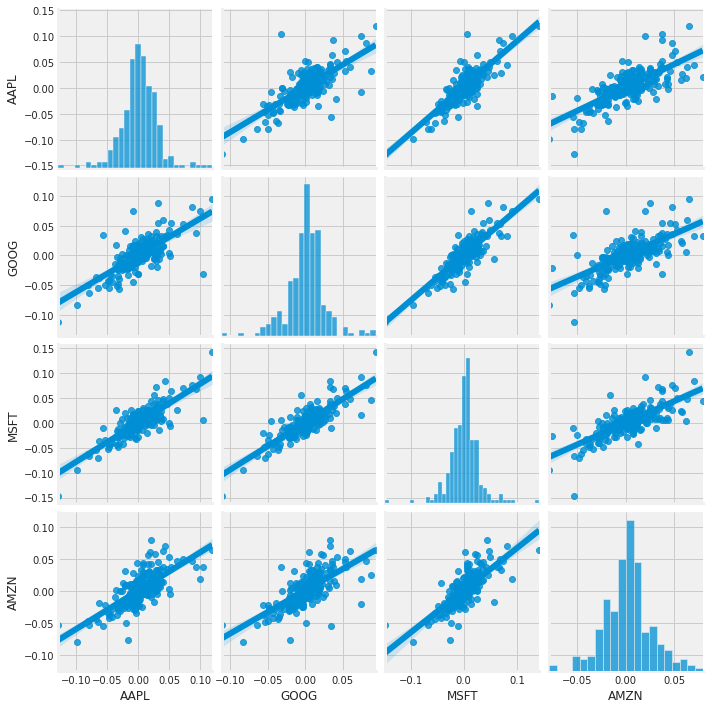

In [14]:
# pair plot is just an addition which will simply call our dataframe for an automatic visual analysis
sns.pairplot(tech_rets, kind='reg')


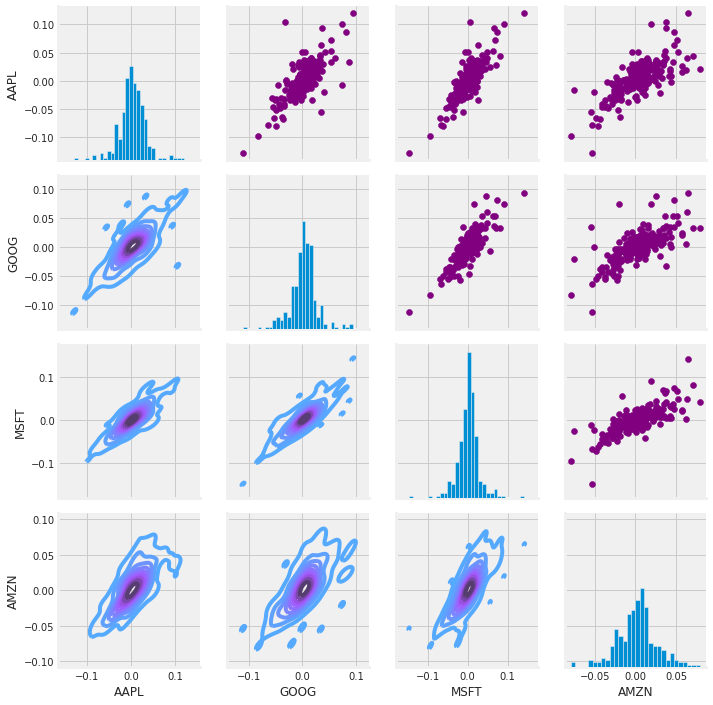

In [15]:
# here we are setting up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# we can also define the lower triangle in the figure, including the plot type 
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

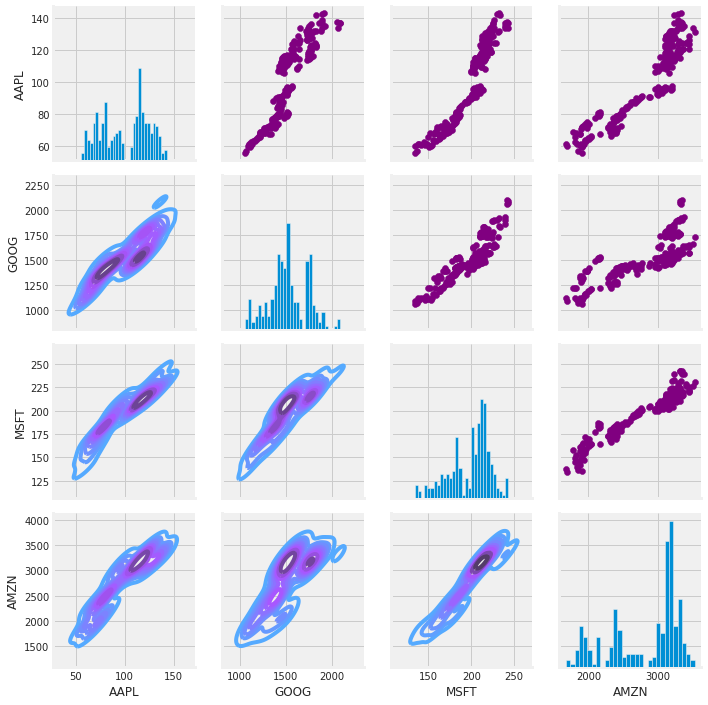

In [16]:
# here we are setting up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# we can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


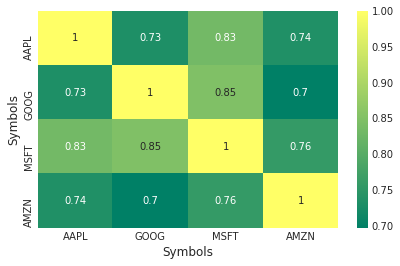

In [17]:
# using seahorn we are implementing correlation
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

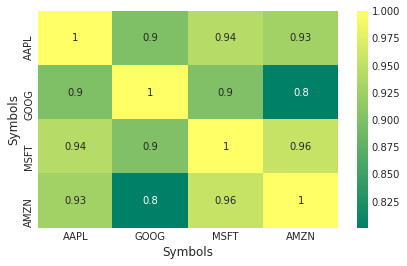

In [18]:
# using seahorn we are implementing correlation
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# LET'S START PREDICTING APPLE STOCK PRICE

In [55]:
# to get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2019-08-25', end=datetime.now())
#to show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,51.797501,51.264999,51.465000,51.622501,104174400.0,50.951172
2019-08-27,52.137501,50.882500,51.965000,51.040001,103493200.0,50.376244
2019-08-28,51.430000,50.830002,51.025002,51.382500,63755200.0,50.714291
2019-08-29,52.330002,51.665001,52.125000,52.252499,83962000.0,51.572975
2019-08-30,52.612499,51.799999,52.540001,52.185001,84573600.0,51.506355
...,...,...,...,...,...,...
2021-02-02,136.309998,134.610001,135.729996,134.990005,83305400.0,134.788589
2021-02-03,135.770004,133.610001,135.759995,133.940002,89880900.0,133.740158
2021-02-04,137.399994,134.589996,136.300003,137.389999,84183100.0,137.184998


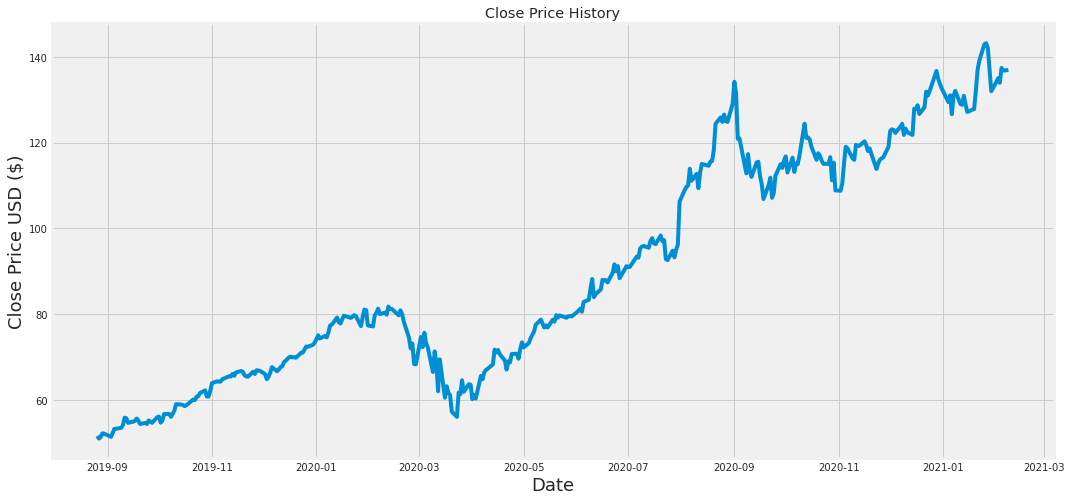

In [56]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [57]:
# we are creating a new dataframe with only chosing the close coloumn
data = df.filter(['Close'])
# here we are converting the dataframe into numpy array
dataset = data.values
# count the number of rows which will be used to train the model
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

294

In [58]:
# here we are scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00632328],
       [0.        ],
       [0.00371796],
       [0.01316215],
       [0.01242944],
       [0.00417931],
       [0.01365067],
       [0.02475031],
       [0.02469602],
       [0.02716564],
       [0.03403168],
       [0.05273011],
       [0.05137319],
       [0.03959508],
       [0.04271599],
       [0.04488708],
       [0.05050478],
       [0.04559271],
       [0.03682694],
       [0.03951367],
       [0.03669124],
       [0.04578266],
       [0.04268887],
       [0.03978507],
       [0.05376139],
       [0.05544396],
       [0.04016501],
       [0.04521277],
       [0.06201148],
       [0.06214718],
       [0.05492833],
       [0.06206577],
       [0.07037015],
       [0.08697895],
       [0.08605621],
       [0.08456362],
       [0.08198543],
       [0.08445504],
       [0.08752171],
       [0.09864847],
       [0.09715589],
       [0.10589445],
       [0.10698002],
       [0.11512157],
       [0.12182479],
       [0.10619298],
       [0.10611157],
       [0.121

In [59]:
# here we will create the training data set and then create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

#here we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# in the below code we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# here we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00632328, 0.        , 0.00371796, 0.01316215, 0.01242944,
       0.00417931, 0.01365067, 0.02475031, 0.02469602, 0.02716564,
       0.03403168, 0.05273011, 0.05137319, 0.03959508, 0.04271599,
       0.04488708, 0.05050478, 0.04559271, 0.03682694, 0.03951367,
       0.03669124, 0.04578266, 0.04268887, 0.03978507, 0.05376139,
       0.05544396, 0.04016501, 0.04521277, 0.06201148, 0.06214718,
       0.05492833, 0.06206577, 0.07037015, 0.08697895, 0.08605621,
       0.08456362, 0.08198543, 0.08445504, 0.08752171, 0.09864847,
       0.09715589, 0.10589445, 0.10698002, 0.11512157, 0.12182479,
       0.10619298, 0.10611157, 0.12103775, 0.14019757, 0.14475682,
       0.14375271, 0.1440512 , 0.14999454, 0.15192143, 0.15751196,
       0.15686058, 0.16367237, 0.15870606, 0.16717326, 0.17080981])]
[0.16861160179762835]

[array([0.00632328, 0.        , 0.00371796, 0.01316215, 0.01242944,
       0.00417931, 0.01365067, 0.02475031, 0.02469602, 0.02716564,
       0.03403168, 0.05273011, 0.05

In [60]:
# here we are installing all the requirements for using LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# building up the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# here we are compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we have trained the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

234/234 [==============================] - 7s 19ms/step - loss: 0.0124


In [61]:
# here we are creating the testing data set
# here we are creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# here we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# here we are converting the data to a numpy array
x_test = np.array(x_test)

# here we are reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# in the codes below we are getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# in the codes below we are getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.191471293834959

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


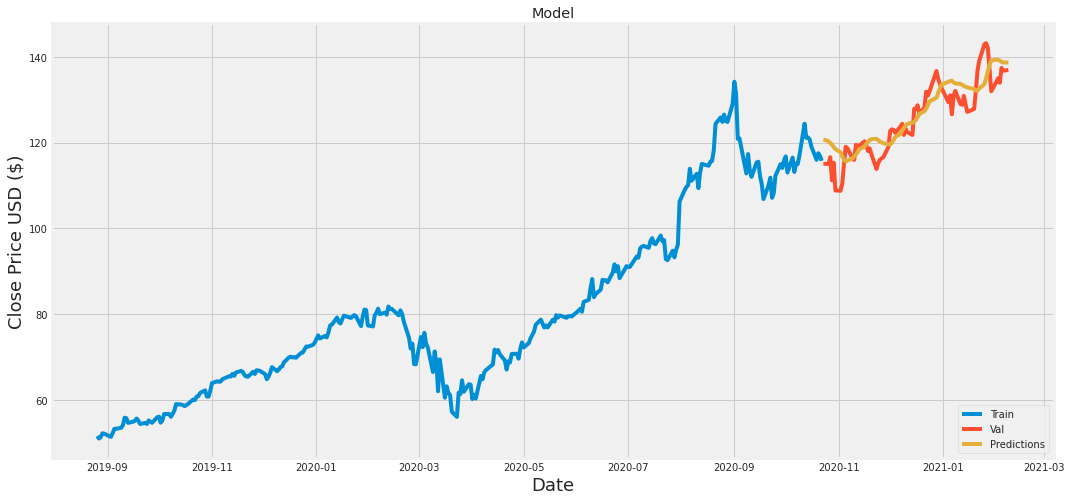

In [62]:
# in the following code the we are plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [63]:
# here shows the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-23,115.040001,120.740738
2020-10-26,115.050003,120.329414
2020-10-27,116.599998,119.882263
2020-10-28,111.199997,119.559738
2020-10-29,115.320000,118.940529
...,...,...
2021-02-02,134.990005,139.267349
2021-02-03,133.940002,139.092575
2021-02-04,137.389999,138.785568


# LET'S START PREDICTING GOOGLE STOCK PRICE

In [64]:
# to get the stock quote
df = DataReader('GOOG', data_source='yahoo', start='2019-08-25', end=datetime.now())
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,1169.469971,1152.959961,1157.260010,1168.890015,1226100,1168.890015
2019-08-27,1182.400024,1161.449951,1180.530029,1167.839966,1077200,1167.839966
2019-08-28,1176.420044,1157.300049,1161.709961,1171.020020,802000,1171.020020
2019-08-29,1196.060059,1181.119995,1181.119995,1192.849976,1088400,1192.849976
2019-08-30,1198.500000,1183.802979,1198.500000,1188.099976,1129800,1188.099976
...,...,...,...,...,...,...
2021-02-02,1955.760010,1914.489990,1922.560059,1927.510010,2273700,1927.510010
2021-02-03,2116.500000,2018.380005,2073.000000,2070.070068,4118200,2070.070068
2021-02-04,2078.550049,2042.589966,2068.889893,2062.370117,1852300,2062.370117


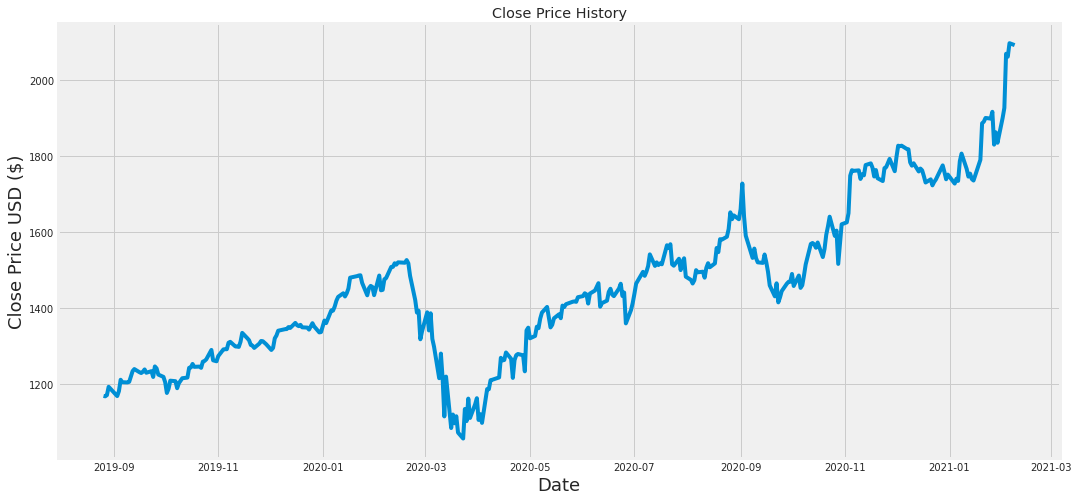

In [65]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [66]:
# we are creating a new dataframe with only chosing the close coloumn
data = df.filter(['Close'])
# here we are converting the dataframe into numpy array
dataset = data.values
# count the number of rows which will be used to train the model
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

294

In [67]:
# here we will scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10780889],
       [0.10680056],
       [0.10985425],
       [0.13081678],
       [0.12625553],
       [0.10732876],
       [0.11983141],
       [0.14861051],
       [0.14241685],
       [0.14191749],
       [0.14344428],
       [0.15705127],
       [0.17057175],
       [0.1756708 ],
       [0.16773901],
       [0.16567442],
       [0.16880489],
       [0.17485449],
       [0.16642346],
       [0.17036052],
       [0.15569726],
       [0.18235421],
       [0.17742805],
       [0.16177569],
       [0.15592772],
       [0.14258002],
       [0.11524132],
       [0.12599624],
       [0.14632507],
       [0.14505758],
       [0.12724463],
       [0.13990096],
       [0.14600823],
       [0.15251873],
       [0.15414164],
       [0.17898367],
       [0.17958864],
       [0.18864387],
       [0.18136511],
       [0.18199891],
       [0.17878205],
       [0.19446312],
       [0.1962492 ],
       [0.20022471],
       [0.22410648],
       [0.19781444],
       [0.19653733],
       [0.195

In [68]:
# here we will create the training data set
# here we will create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# in the below code we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# here we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# here we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.10780889, 0.10680056, 0.10985425, 0.13081678, 0.12625553,
       0.10732876, 0.11983141, 0.14861051, 0.14241685, 0.14191749,
       0.14344428, 0.15705127, 0.17057175, 0.1756708 , 0.16773901,
       0.16567442, 0.16880489, 0.17485449, 0.16642346, 0.17036052,
       0.15569726, 0.18235421, 0.17742805, 0.16177569, 0.15592772,
       0.14258002, 0.11524132, 0.12599624, 0.14632507, 0.14505758,
       0.12724463, 0.13990096, 0.14600823, 0.15251873, 0.15414164,
       0.17898367, 0.17958864, 0.18864387, 0.18136511, 0.18199891,
       0.17878205, 0.19446312, 0.1962492 , 0.20022471, 0.22410648,
       0.19781444, 0.19653733, 0.19540416, 0.20849257, 0.22542204,
       0.22605584, 0.225835  , 0.24221705, 0.24462732, 0.23293125,
       0.23255685, 0.23178859, 0.24471371, 0.26719353, 0.25358654])]
[0.24855476829463408]

[array([0.10780889, 0.10680056, 0.10985425, 0.13081678, 0.12625553,
       0.10732876, 0.11983141, 0.14861051, 0.14241685, 0.14191749,
       0.14344428, 0.15705127, 0.17

In [69]:
# these are the set of requirements 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# here we are building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# here we are compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

234/234 [==============================] - 7s 19ms/step - loss: 0.0158


In [70]:
# in this step we are creating the testing data set and creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# in this step we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# here we are converting the data to a numpy array
x_test = np.array(x_test)

# here we will be reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# here we are getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# here we are getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

87.85905568128513

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


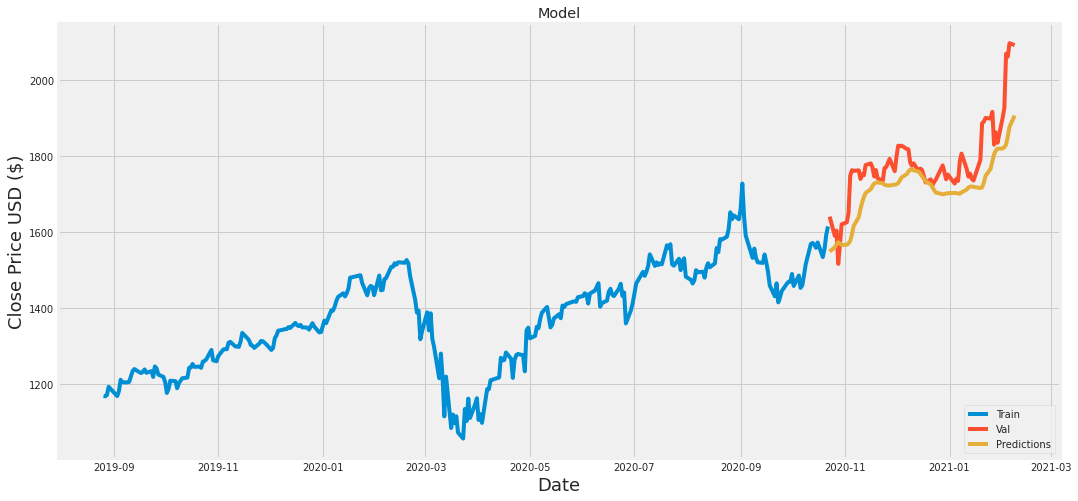

In [71]:
# we would be plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# we would be visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [72]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-23,1641.000000,1549.010254
2020-10-26,1590.449951,1560.443359
2020-10-27,1604.260010,1567.907593
2020-10-28,1516.619995,1573.751343
2020-10-29,1567.239990,1570.326416
...,...,...
2021-02-02,1927.510010,1823.943604
2021-02-03,2070.070068,1830.752197
2021-02-04,2062.370117,1851.868896


# LET'S START PREDICTING MICROSOFT STOCK PRICE

In [73]:
# here we are getting the stock quote
df = DataReader('MSFT', data_source='yahoo', start='2019-08-25', end=datetime.now())
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,135.559998,133.899994,134.990005,135.449997,20312600.0,133.575623
2019-08-27,136.720001,134.660004,136.389999,135.740005,23102100.0,133.861588
2019-08-28,135.759995,133.550003,134.880005,135.559998,17393300.0,133.684082
2019-08-29,138.440002,136.910004,137.250000,138.119995,20168700.0,136.208664
2019-08-30,139.179993,136.270004,139.149994,137.860001,23940100.0,135.952271
...,...,...,...,...,...,...
2021-02-02,242.309998,238.690002,241.300003,239.509995,25916300.0,239.509995
2021-02-03,245.089996,239.259995,239.570007,243.000000,27158100.0,243.000000
2021-02-04,243.240005,240.369995,242.660004,242.009995,25296100.0,242.009995


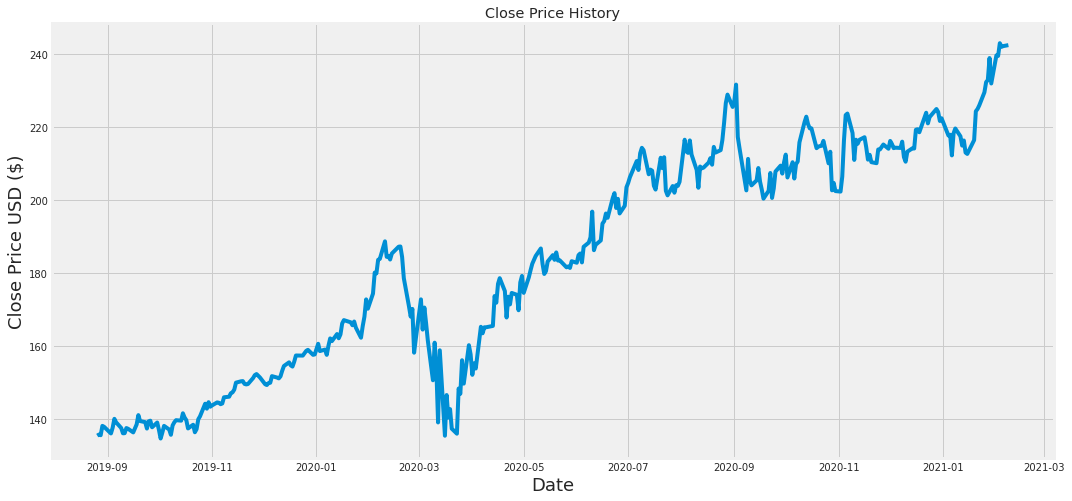

In [74]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [75]:
# we are creating a new dataframe with only chosing the close coloumn
data = df.filter(['Close'])
# we are converting the dataframe to a numpy array
dataset = data.values
# we are getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

294

In [76]:
# we are scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00738351],
       [0.0100601 ],
       [0.00839874],
       [0.03202585],
       [0.02962627],
       [0.01282879],
       [0.02750356],
       [0.04983857],
       [0.04107071],
       [0.02648833],
       [0.01319804],
       [0.01356715],
       [0.02648833],
       [0.02464249],
       [0.01550538],
       [0.02528847],
       [0.03571768],
       [0.05925254],
       [0.04420866],
       [0.04143983],
       [0.02519622],
       [0.04347029],
       [0.04513151],
       [0.02842641],
       [0.04042459],
       [0.02233515],
       [0.        ],
       [0.01504388],
       [0.03202585],
       [0.0227965 ],
       [0.00941398],
       [0.03313347],
       [0.04107071],
       [0.04642361],
       [0.04522389],
       [0.06386722],
       [0.05316114],
       [0.046516  ],
       [0.02547309],
       [0.03488693],
       [0.01587449],
       [0.02390412],
       [0.04882333],
       [0.05611446],
       [0.08804807],
       [0.07549615],
       [0.09192438],
       [0.080

In [77]:
# here we are creating the training data set and the scaled data
train_data = scaled_data[0:int(training_data_len), :]
# we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00738351, 0.0100601 , 0.00839874, 0.03202585, 0.02962627,
       0.01282879, 0.02750356, 0.04983857, 0.04107071, 0.02648833,
       0.01319804, 0.01356715, 0.02648833, 0.02464249, 0.01550538,
       0.02528847, 0.03571768, 0.05925254, 0.04420866, 0.04143983,
       0.02519622, 0.04347029, 0.04513151, 0.02842641, 0.04042459,
       0.02233515, 0.        , 0.01504388, 0.03202585, 0.0227965 ,
       0.00941398, 0.03313347, 0.04107071, 0.04642361, 0.04522389,
       0.06386722, 0.05316114, 0.046516  , 0.02547309, 0.03488693,
       0.01587449, 0.02390412, 0.04882333, 0.05611446, 0.08804807,
       0.07549615, 0.09192438, 0.08047993, 0.08371026, 0.09137064,
       0.09054003, 0.08684821, 0.08869405, 0.10438405, 0.1057684 ,
       0.11462864, 0.11684359, 0.1237656 , 0.14139369, 0.14480851])]
[0.14527000098298415]

[array([0.00738351, 0.0100601 , 0.00839874, 0.03202585, 0.02962627,
       0.01282879, 0.02750356, 0.04983857, 0.04107071, 0.02648833,
       0.01319804, 0.01356715, 0.02

In [78]:
# here we are imporinting the requirements required to run LSTM model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# we are building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#  we are compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we would train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

234/234 [==============================] - 7s 19ms/step - loss: 0.0427


In [79]:
# we are creating the testing data set and creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# here we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# we are converting the data to a numpy array
x_test = np.array(x_test)

# here we are reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# here we are geting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# here we are geting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.580630415256944

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


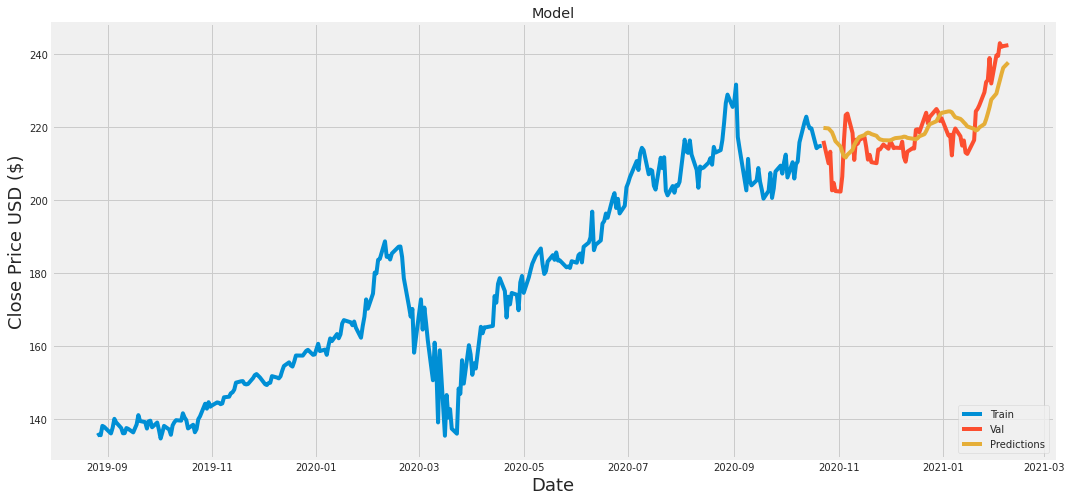

In [80]:
# here we are plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# here we are visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [81]:
# showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-23,216.229996,219.784851
2020-10-26,210.080002,219.633667
2020-10-27,213.250000,219.109161
2020-10-28,202.679993,218.598450
2020-10-29,204.720001,217.460449
...,...,...
2021-02-02,239.509995,231.028641
2021-02-03,243.000000,232.784485
2021-02-04,242.009995,234.599869


# LET'S START PREDICTING AMAZON STOCK PRICE

In [82]:
# here we are getting the stock quote
df = DataReader('AMZN', data_source='yahoo', start='2019-08-25', end=datetime.now())
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,1770.000000,1743.510010,1766.910034,1768.869995,3080000,1768.869995
2019-08-27,1779.400024,1746.680054,1775.729980,1761.829956,3019700,1761.829956
2019-08-28,1767.859985,1744.050049,1755.000000,1764.250000,2419700,1764.250000
2019-08-29,1798.550049,1777.250000,1783.000000,1786.400024,3015100,1786.400024
2019-08-30,1799.739990,1764.569946,1797.489990,1776.290039,3058700,1776.290039
...,...,...,...,...,...,...
2021-02-02,3427.739990,3361.129883,3380.000000,3380.000000,7098600,3380.000000
2021-02-03,3434.000000,3308.620117,3425.010010,3312.530029,7088800,3312.530029
2021-02-04,3347.000000,3277.750000,3330.000000,3331.000000,3670700,3331.000000


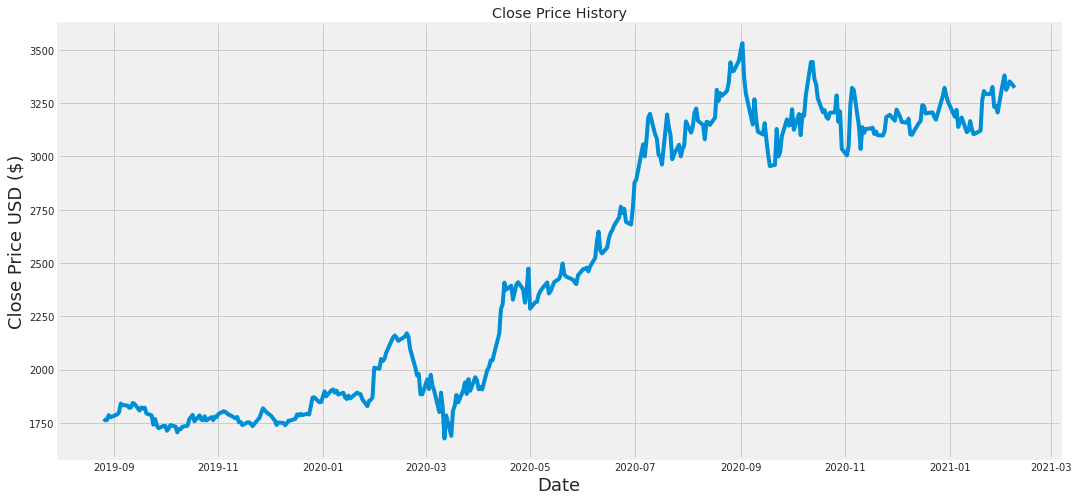

In [83]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [84]:
# here we are creating a new dataframe with only the 'Close column
data = df.filter(['Close'])
# her we are converting the dataframe to a numpy array
dataset = data.values
# here we are getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

294

In [85]:
# here we are scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04974015],
       [0.04594465],
       [0.04724937],
       [0.05919111],
       [0.05374051],
       [0.06104569],
       [0.06685753],
       [0.08847663],
       [0.08458952],
       [0.08342498],
       [0.07760242],
       [0.07891786],
       [0.09000241],
       [0.08773263],
       [0.07075003],
       [0.07868068],
       [0.07593646],
       [0.07811456],
       [0.06337477],
       [0.05859808],
       [0.03504345],
       [0.04944899],
       [0.03408918],
       [0.02633109],
       [0.03197044],
       [0.03183026],
       [0.01974294],
       [0.02577584],
       [0.03398678],
       [0.03021827],
       [0.01558087],
       [0.02446573],
       [0.02353304],
       [0.02981932],
       [0.0322508 ],
       [0.04893685],
       [0.05435513],
       [0.05977335],
       [0.04361564],
       [0.05879216],
       [0.04804727],
       [0.046128  ],
       [0.0561612 ],
       [0.04567508],
       [0.05416638],
       [0.04641909],
       [0.05573527],
       [0.053

In [86]:
# here we are creating the training data set
# here we are creating the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# we are splitting the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# here we are converting the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# we are reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04974015, 0.04594465, 0.04724937, 0.05919111, 0.05374051,
       0.06104569, 0.06685753, 0.08847663, 0.08458952, 0.08342498,
       0.07760242, 0.07891786, 0.09000241, 0.08773263, 0.07075003,
       0.07868068, 0.07593646, 0.07811456, 0.06337477, 0.05859808,
       0.03504345, 0.04944899, 0.03408918, 0.02633109, 0.03197044,
       0.03183026, 0.01974294, 0.02577584, 0.03398678, 0.03021827,
       0.01558087, 0.02446573, 0.02353304, 0.02981932, 0.0322508 ,
       0.04893685, 0.05435513, 0.05977335, 0.04361564, 0.05879216,
       0.04804727, 0.046128  , 0.0561612 , 0.04567508, 0.05416638,
       0.04641909, 0.05573527, 0.05393999, 0.06190828, 0.06903563,
       0.06744516, 0.06424276, 0.06016151, 0.05891075, 0.05123894,
       0.05466241, 0.04124345, 0.04204675, 0.0339005 , 0.04093078])]
[0.04107095766466651]

[array([0.04974015, 0.04594465, 0.04724937, 0.05919111, 0.05374051,
       0.06104569, 0.06685753, 0.08847663, 0.08458952, 0.08342498,
       0.07760242, 0.07891786, 0.09

In [87]:
# following are the requirements which would be required by LSTM model 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# here we are building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# here we are compilin the model
model.compile(optimizer='adam', loss='mean_squared_error')

# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

234/234 [==============================] - 7s 19ms/step - loss: 0.0304


In [88]:
# we are creating the testing data set and creating a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# we are creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# we are converting the data to a numpy array
x_test = np.array(x_test)

# we are reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#  we are getting the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# we are getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

105.14416207317767

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


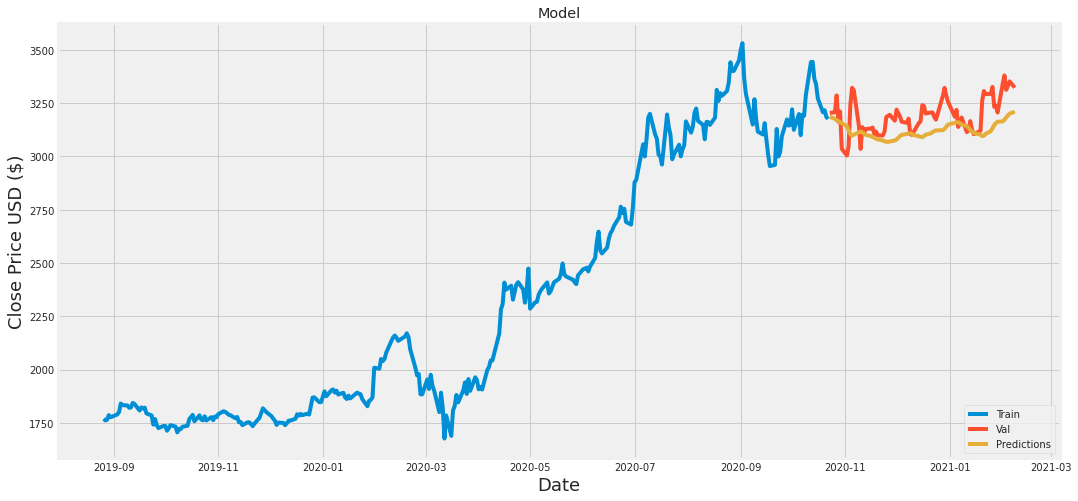

In [89]:
# we are plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# we are visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [90]:
# showing the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-10-23,3204.399902,3185.822998
2020-10-26,3207.040039,3176.759766
2020-10-27,3286.330078,3168.770996
2020-10-28,3162.780029,3166.409668
2020-10-29,3211.010010,3160.479004
...,...,...
2021-02-02,3380.000000,3171.866699
2021-02-03,3312.530029,3183.101807
2021-02-04,3331.000000,3192.330811
